In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora, models

from collections import Counter

In [12]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv',encoding='utf-8-sig')

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
Day = data['Date'].map(lambda x: x.day)
Year = data['Date'].map(lambda x: x.year)
Month = data['Date'].map(lambda x: x.month)

crashes_per_year = Counter(Year)
years = list(crashes_per_year.keys())
crashes_year = list(crashes_per_year.values())

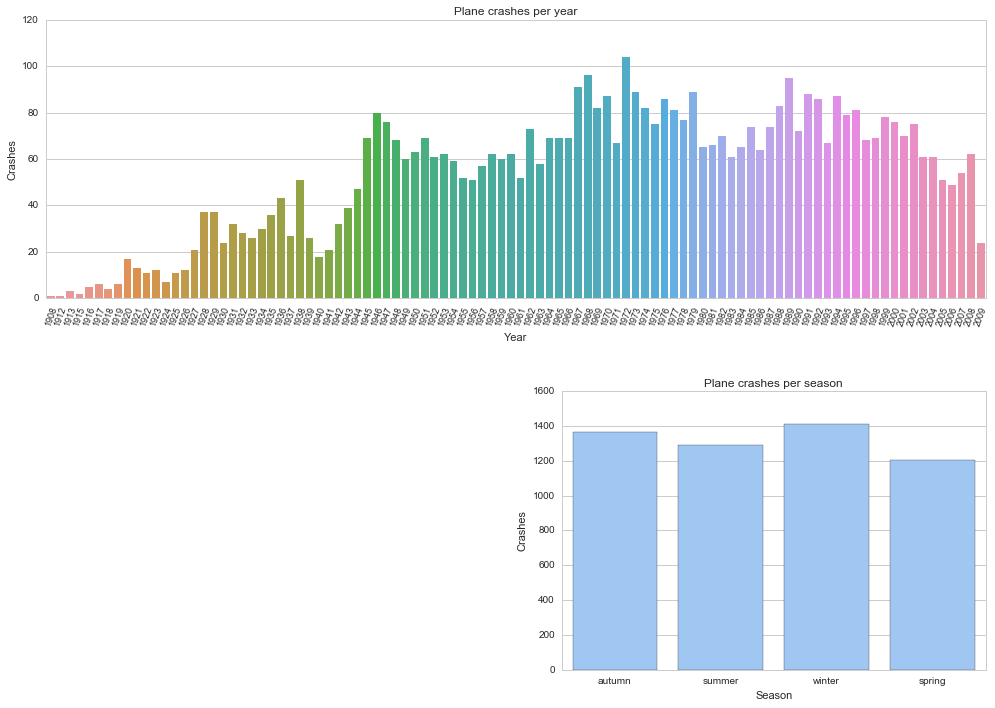

In [14]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

Season = Month.apply(get_season)

crashes_per_season = Counter(Season)
seasons = list(crashes_per_season.keys())
crashes_season = list(crashes_per_season.values())

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig = plt.figure(figsize=(14, 10))

sub1 = fig.add_subplot(211)
sns.barplot(x=years, y=crashes_year, ax=sub1)
sub1.set(ylabel="Crashes", xlabel="Year", title="Plane crashes per year")
plt.setp(sub1.patches, linewidth=0)
plt.setp(sub1.get_xticklabels(), rotation=70, fontsize=9)



sub3 = fig.add_subplot(224)
sns.barplot(x=seasons, y=crashes_season, color='b', ax=sub3)
texts = sub3.set(ylabel="Crashes", xlabel="Season", title="Plane crashes per season")

plt.tight_layout(w_pad=4, h_pad=3)
plt.savefig('yearNseasons.png')

In [15]:
# calculating the "Survived" column
data["Survivors"] = data["Aboard"] - data["Fatalities"]
# calculating the total number of survived and fatalaties for each year
aboard_fatalities = data.pivot_table(values=["Survivors","Fatalities"],index=Year,aggfunc=np.sum)

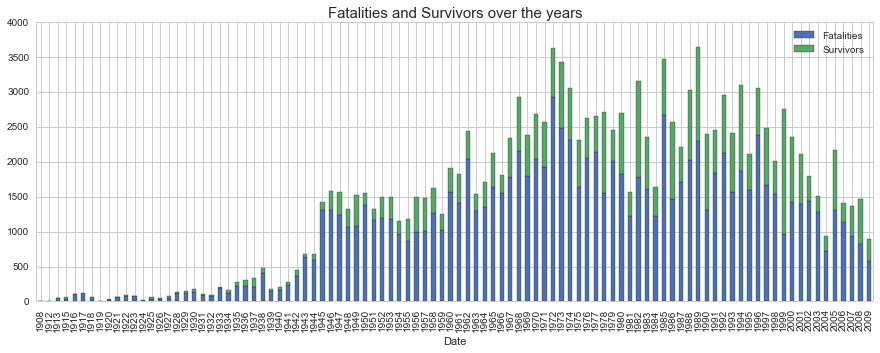

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
aboard_fatalities.plot(kind="bar",stacked=True,ax=ax)
plt.title("Fatalities and Survivors over the years",fontsize=15)
plt.show()
fig.savefig('ratio.png')